Saving Student_Performance.csv to Student_Performance (3).csv


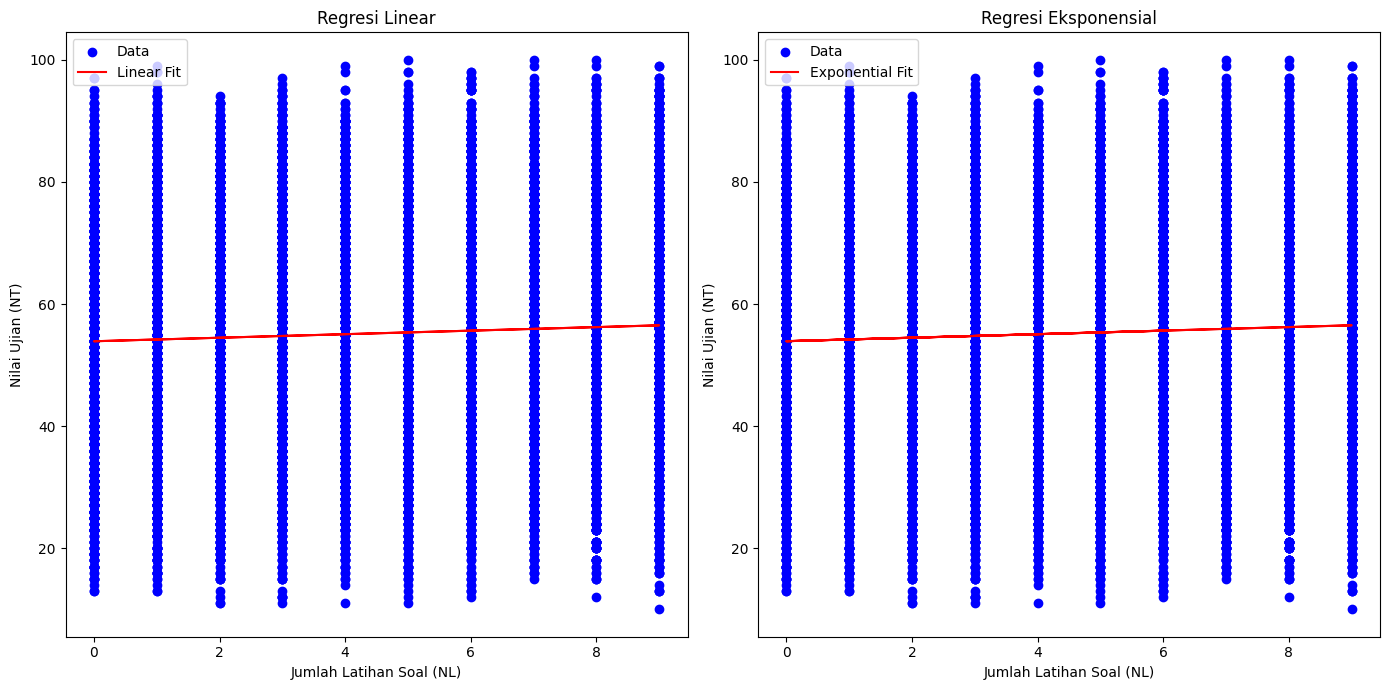

Galat RMS untuk model linear: 19.19360524526426
Galat RMS untuk model eksponensial: 19.19364130292259


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit
from sklearn.metrics import mean_squared_error
from google.colab import files

# Upload file
uploaded = files.upload()

# Load dataset dari file yang diupload
filename = 'Student_Performance.csv'
data = pd.read_csv(filename)

# Periksa beberapa baris pertama dari dataset
data.head()

# Pilih kolom yang relevan
NL = data['Sample Question Papers Practiced'].values.reshape(-1, 1)
NT = data['Performance Index'].values

# Model Linear
linear_model = LinearRegression()
linear_model.fit(NL, NT)
NT_pred_linear = linear_model.predict(NL)

# Model Eksponensial
def exp_func(x, a, b):
    return a * np.exp(b * x)

params, covariance = curve_fit(exp_func, NL.flatten(), NT)
NT_pred_exp = exp_func(NL, params[0], params[1])

# Plot hasil regresi
plt.figure(figsize=(14, 7))

# Plot Regresi Linear
plt.subplot(1, 2, 1)
plt.scatter(NL, NT, color='blue', label='Data')
plt.plot(NL, NT_pred_linear, color='red', label='Linear Fit')
plt.xlabel('Jumlah Latihan Soal (NL)')
plt.ylabel('Nilai Ujian (NT)')
plt.title('Regresi Linear')
plt.legend()

# Plot Regresi Eksponensial
plt.subplot(1, 2, 2)
plt.scatter(NL, NT, color='blue', label='Data')
plt.plot(NL, NT_pred_exp, color='red', label='Exponential Fit')
plt.xlabel('Jumlah Latihan Soal (NL)')
plt.ylabel('Nilai Ujian (NT)')
plt.title('Regresi Eksponensial')
plt.legend()

plt.tight_layout()
plt.show()

# Hitung Galat RMS
rms_linear = np.sqrt(mean_squared_error(NT, NT_pred_linear))
rms_exp = np.sqrt(mean_squared_error(NT, NT_pred_exp))

print(f"Galat RMS untuk model linear: {rms_linear}")
print(f"Galat RMS untuk model eksponensial: {rms_exp}")

